In [15]:
import axelrod as axl
import matplotlib.pyplot as plt
import seaborn
import csv
from sklearn.linear_model import LogisticRegression
import pandas
%matplotlib inline

In [26]:
alex, camille = axl.Alternator(), axl.TitForTat()
match = axl.Match([alex, camille], 10)
_ = match.play()
print(match.sparklines(c_symbol='😀', d_symbol='🎁'))

😀🎁😀🎁😀🎁😀🎁😀🎁
😀😀🎁😀🎁😀🎁😀🎁😀


In [86]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]
christmas = axl.Tournament(family, turns=50, repetitions=1)
results = christmas.play()
results.scores

[[525], [562], [417], [622], [646], [646]]

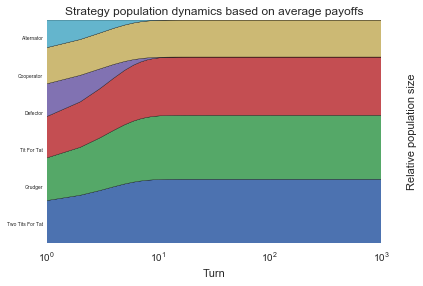

In [88]:
evo = axl.Ecosystem(results)
evo.reproduce(1000)
plot = axl.Plot(results)
p = plot.stackplot(evo);

In [36]:
p.savefig("../images/basic_christmas_evo.svg")

In [89]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]

def check_if_end_pop_cooperates(r=3,p=1,s=0,t=5, digits=5, family=family, turns=10000):
    game = axl.Game(r=r, p=p, s=s, t=t)
    christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
    results = christmas.play()
    evo = axl.Ecosystem(results)
    evo.reproduce(turns)
    last_pop = [round(pop, digits) for pop in evo.population_sizes[-1]]
    return last_pop[1] == last_pop[2] == 0, last_pop

In [90]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=5)

(True, [0.16576, 0.0, 0.0, 0.26105, 0.28659, 0.28659])

In [93]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=50)

(True, [0.0, 0.0, 0.0, 0.06083, 0.46958, 0.46958])

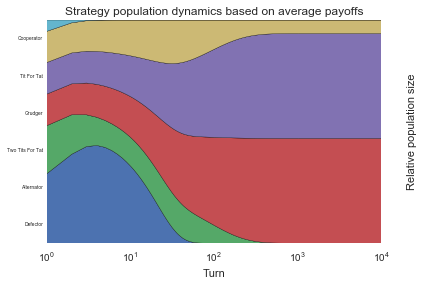

In [95]:
game = axl.Game(r=3, p=1, s=0, t=50)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_10_christmas_evo.svg")

In [96]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=500)

(False, [0.0, 1.0, 0.0, 0.0, 0.0, 0.0])

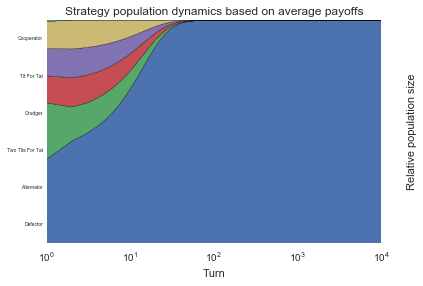

In [97]:
game = axl.Game(r=3, p=1, s=0, t=500)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_100_christmas_evo.svg")

# Analyse full data

In [30]:
df = pandas.read_csv("christmas.csv")
df.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,9705.000000,9705.000000,9705.000000,9705.000000,9705,9705.000000,9705.000000,9.705000e+03,9705.000000,9705.000000,9705.000000
mean,6.669338,3.624935,1.691636,11.492051,0.989799,0.112192,0.009995,1.236476e-08,0.258030,0.309891,0.309891
std,3.439604,2.472382,1.711312,5.472649,0.100488,0.083489,0.099478,1.121187e-06,0.038531,0.053724,0.053724
min,3.000000,1.000000,0.000000,5.000000,False,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.933333,1.861905,0.533333,5.000000,1,0.021790,0.000000,0.000000e+00,0.255010,0.274550,0.274550
50%,5.076190,2.866667,1.184000,11.785714,1,0.120780,0.000000,0.000000e+00,0.263280,0.303940,0.303940
75%,9.228571,4.532698,2.264000,18.571429,1,0.190560,0.000000,0.000000e+00,0.273470,0.346990,0.346990
max,16.495238,14.493333,13.527111,18.571429,True,0.247240,1.000000,1.100000e-04,0.325060,0.489850,0.489850


## Simple frequency analysis

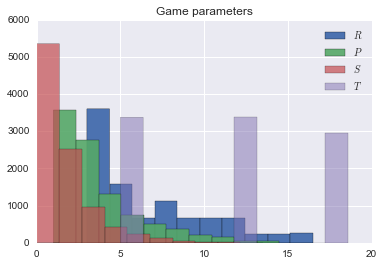

In [57]:
plt.figure()
plt.hist(df["R"], label="$R$")
plt.hist(df["P"], label="$P$", alpha=.9)
plt.hist(df["S"], label="$S$", alpha=.7)
plt.hist(df["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters");

In [77]:
df_promise = df[df["Promise"]==True]
df_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,9606.000000,9606.000000,9606.000000,9606.000000,9606,9606.000000,9606,9606,9606.000000,9606.000000,9606.000000
mean,6.699809,3.626151,1.693227,11.443108,1,0.113348,0,0,0.260685,0.312984,0.312984
std,3.443017,2.483692,1.716521,5.469618,0,0.083134,0,0,0.028447,0.043933,0.043933
min,3.000000,1.000000,0.000000,5.000000,True,0.000000,0,0,0.030500,0.251030,0.251030
25%,3.933333,1.853333,0.533333,5.000000,1,0.024300,0,0,0.255262,0.275192,0.275192
50%,5.076190,2.866667,1.182222,11.785714,1,0.122195,0,0,0.263455,0.304780,0.304780
75%,9.228571,4.532698,2.260899,18.571429,1,0.191072,0,0,0.273560,0.347428,0.347428
max,16.495238,14.493333,13.527111,18.571429,True,0.247240,0,0,0.325060,0.484750,0.484750


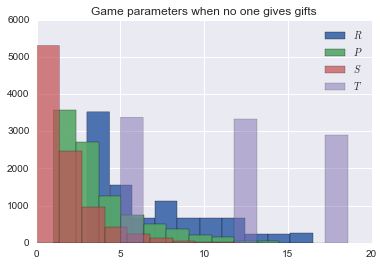

In [79]:
plt.figure()
plt.hist(df_promise["R"], label="$R$")
plt.hist(df_promise["P"], label="$P$", alpha=.9)
plt.hist(df_promise["S"], label="$S$", alpha=.7)
plt.hist(df_promise["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when no one gives gifts");

In [62]:
df_broken_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,99.000000,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99.000000,99.000000
mean,3.712795,3.507000,1.537335,16.240981,0,0,0.979798,0.000001,0.000501,0.009850,0.009850
std,0.853160,0.816592,1.088080,3.238628,0,0,0.141407,0.000011,0.003570,0.068946,0.068946
min,3.000000,2.600000,0.000000,11.785714,False,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.866667,0.606963,11.785714,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.585714,3.413333,1.457778,18.571429,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.038095,3.835556,2.297333,18.571429,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.114286,5.773333,4.484148,18.571429,False,0,1.000000,0.000110,0.029430,0.489850,0.489850


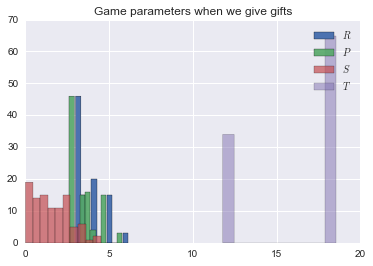

In [76]:
df_broken_promise = df[df["Promise"]==False]
plt.figure()
plt.hist(list(df_broken_promise["R"]), label="$R$")
plt.hist(list(df_broken_promise["P"]), label="$P$", alpha=.9)
plt.hist(list(df_broken_promise["S"]), label="$S$", alpha=.7)
plt.hist(list(df_broken_promise["T"]), label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when we give gifts");

In [3]:
X = df[df.columns[:4]]
y = df["Promise"]
model = LogisticRegression()
result = model.fit(X, y)

In [4]:
pandas.DataFrame(list(zip(X.columns, model.coef_[0])), columns=["Variables", "Coefficients"])

,Variables,Coefficients
0,R,6.704002
1,P,-6.128320
2,S,0.097943
3,T,-0.336056


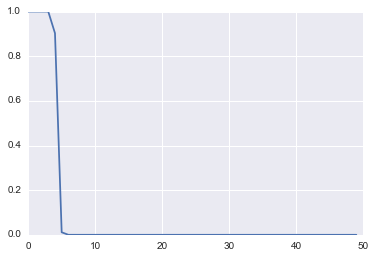

In [29]:
plt.figure()
x = range(50)
y = [model.predict_proba([[r,5,0,1]])[0][0] for r in x]
plt.plot(x,y);

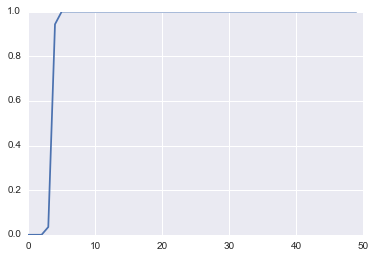

In [23]:
plt.figure()
x = range(50)
y = [model.predict_proba([[3,p,0,1]])[0][0] for p in x]
plt.plot(x,y);

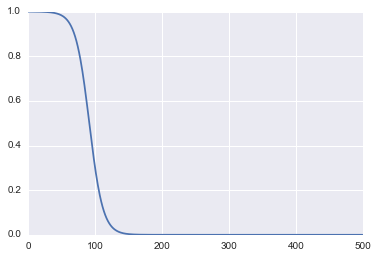

In [26]:
plt.figure()
x = range(500)
y = [model.predict_proba([[3,5,s,1]])[0][0] for s in x]
plt.plot(x,y);

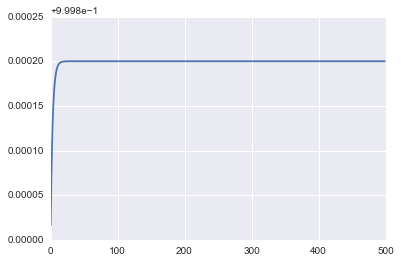

In [27]:
plt.figure()
x = range(500)
y = [model.predict_proba([[3,5,0,t]])[0][0] for t in x]
plt.plot(x,y);